In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vmware-zero-shot-information-retrieval/sample_submission.csv
/kaggle/input/vmware-zero-shot-information-retrieval/vmware_ir_content.csv
/kaggle/input/vmware-zero-shot-information-retrieval/test.csv


# Documents EDA

In [2]:
import pandas as pd
content = pd.read_csv("/kaggle/input/vmware-zero-shot-information-retrieval/vmware_ir_content.csv")

In [3]:
content.document_group.value_counts()

document_group
docs        258642
blog         31396
kb           28113
cb            3217
vmw-com       1003
sdw            664
tz             503
tanzu          243
glossary       182
Name: count, dtype: int64

In [4]:
for k,v in content[content.document_group == 'docs'].iloc[0].to_dict().items():
    print(k,v)


document_group docs
f_name en-2021-VMware-Cloud-Director-8-10-com-vmware-vcloud-admin-doc_810-GUID-4E95CAD9-3FF6-45D6-A85F-34937918D5D9-html.txt
raw_text Add organizations to the virtual data center template access list to allow those organizations to instantiate virtual data centers from the template.
Procedure
Select an organization from the Available Organizations list and click Add to add the organization to the virtual data center template access list. 
Repeat this step to add multiple organizations to the access list.
Select an organization from the Selected Organizations list and click Remove to remove the organization from the virtual data center access list. 
Repeat this step to remove multiple organizations from the access list.
Click Next.
raw_meta {'type': 'task', 'subject': 'vmware, cloudcomputing, datacenterefficiency, multi-tenancy, privatecloud, publiccloud', 'title': 'Configure the Access List', 'abstract': '', 'description': 'Add organizations to the virtual data cent

In [5]:
l = list(content[content.document_group == 'docs'][content['raw_text'].notna()]['raw_text'])

<ipython-input-5-7dbf9ee2de69>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = list(content[content.document_group == 'docs'][content['raw_text'].notna()]['raw_text'])


In [6]:
lengths = sorted(list(map(len, l)))[:-100]
sum(lengths)/len(l), max(lengths), min(lengths)

(2070.55026491886, 109022, 3)

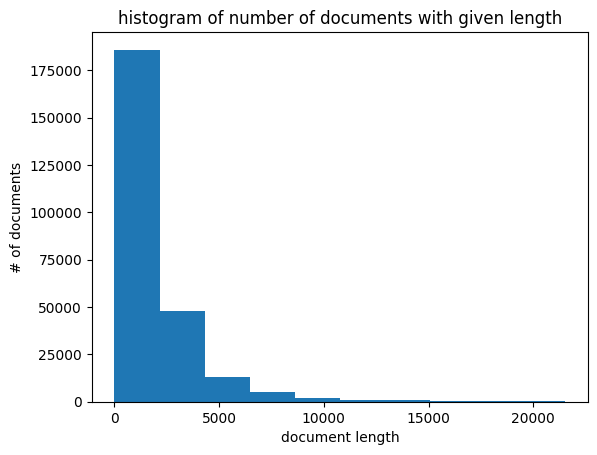

In [7]:
import matplotlib.pyplot as plt
plt.hist(lengths[:-1000])
plt.title("histogram of number of documents with given length")
plt.xlabel("document length")
plt.ylabel("# of documents")
plt.show()

In [8]:
for k,v in content[content.document_group == 'blog'].iloc[100].to_dict().items():
    print(k,v)


document_group blog
f_name https---blogs.vmware.com-networkvirtualization-2021-05-it-should-be-easy-to-upgrade-your-load-balancer-and-it-can-be.html-easylb3-.txt
raw_text EasyLB3 | Network and Security Virtualization
Please activate some Widgets.
Networking & Security Technology
Networking and Security Solutions
Intrinsic Security Solutions
Network Security
Network Automation
Multi-cloud Networking
Container Networking
Company Information
Leadership
Careers at VMware
Acquisitions
Office Locations
Contact VMware
Investor Relations
VMware Foundation
Why Choose VMware?
News & Events
Newsroom
Articles
Events
Awards
Media Resource Center
Media & Contacts
Community
NSX Tech Zone
VMware NSX on YouTube
VMware NSX on Twitter
VMware NSX on Facebook
VMware Blogs
Community Terms of Use
Developer Center
© 2021 VMware, Inc
Contact Us
Terms of Use
Privacy
Accessibility
Site Index
Trademarks
Help
Feedback
Twitter
Facebook
LinkedIn
YouTube
RSS
Cookie Settings
raw_meta {'microsites-utag': 'https://tags.

In [9]:
l = list(content[content.document_group == 'blog'][content['raw_text'].notna()]['raw_text'])

<ipython-input-9-ee80dbc2a401>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = list(content[content.document_group == 'blog'][content['raw_text'].notna()]['raw_text'])


In [10]:
lengths = sorted(list(map(len, l)))
sum(lengths)/len(l), max(lengths), min(lengths)

(3532.3751114791694, 106315, 33)

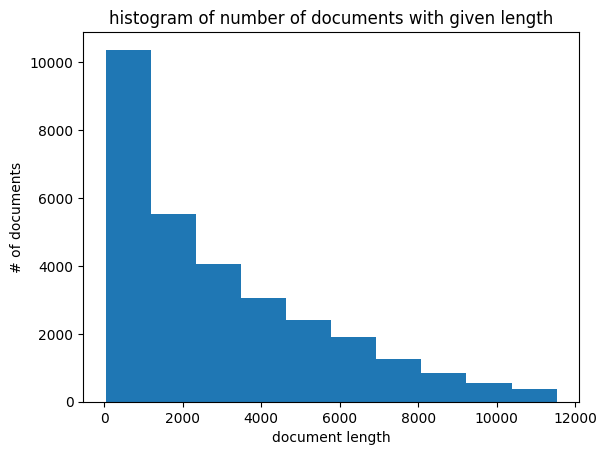

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths[:-1000])
plt.title("histogram of number of documents with given length")
plt.xlabel("document length")
plt.ylabel("# of documents")
plt.show()

# Queries EDA

In [12]:
import pandas as pd
queries = pd.read_csv("/kaggle/input/vmware-zero-shot-information-retrieval/test.csv")

In [13]:
queries = list(queries['Query'])
len(queries)

2351

In [14]:
from random import random


In [15]:
for _ in range(20):
    print(queries[int(random() * len(queries))])
    

how to ping using mac
why vm is slow
how to install vmware tools centos
what is application security in cyber security
what does vmware do
how to enable hyperthreading
why tanzu
how to backup vmware image
how to check elasticsearch is running
what vmware
how to change keyboard language in vmware console
hypervisor what is
how to access dcui from vsphere client
what do the workspace one productivity components include
how many cores should i give my vm
how to generate a bearer token
how to create a distributed switch in vsphere 6.7
how to add nfs datastore to esxi 6.7
how to minimize vmware horizon client
what does vmware tools do


In [16]:

fqueries = filter(lambda text: ('how to' not in text) and ('what is' not in text), queries)
how_to = filter(lambda text: 'how to' in text, queries)
what_is = filter(lambda text: 'what is' in text, queries)

In [17]:
def stats(fqueries):
    fqueries = list(fqueries)
    print(len(fqueries), len(fqueries)/len(queries))
    for _ in range(20):
        print(fqueries[int(random() * len(fqueries) - 1)])
    


In [18]:
stats(fqueries)

396 0.1684389621437686
what technology will allow containers in different physical servers to communicate?
netstat check if port is open
where vmware files are stored
[400] an error occurred while sending an authentication request to the vcenter single sign-on server - an error occurred when processing metadata during vcenter single sign-on setup: the service provider validation failed. verify that the server url is correct and is in fqdn format, or that the hostname is a trusted service provider alias.
the vmware tools power-on script did not run successfully in this virtual machine. if you have configured a custom power-on script in this virtual machine, make sure that it contains no errors. you can also submit a support request to report this issue.
pci passthrough devices cannot be added when nested hardware-assisted virtualization is enabled.
vmware redo log
error caused by file /vmfs/volumes/ when migrating
how vm works
what does virtualization do on pc
what are two requirements 

In [19]:
stats(how_to)

1371 0.5831561037856231
how to take screenshot in vmware horizon client
how to uninstall intelligent hub on samsung
how to mount vmware tools in linux
how to install vmware on windows 7
how to install windows 10 on vmware fusion 12
how to install ssl certificate vmware esxi
how to secure a virtual machine
how to move a vm from one host to another
how to check if iis is running
how to change vcenter root password
how to access vmware web client
how to close vmware
how to upgrade vmware horizon
how to deploy vm from ova file
how to transfer vm from one esxi to another
how to run vmdk file in vmware
how to change vmware ip address
how to reset vcenter root password
how to use vsphere
how to enable vsan


In [20]:
stats(what_is)

585 0.24883028498511273
what is multipathing in vmware
what is vdi and how it works
what is infrastructure security in cyber security
what is cloud infrastructure
what is vmotion in vmware how to configure it
what is vdi stand for
what is server virtualization?
what is com.samsung.sdm.sdmviewer
what is a vmware snapshot
what is the role of hypervisor in cloud computing
what is the function of a hypervisor in a cloud solution
what is vmware vsphere hypervisor
vmware what is it
what is sddc
what is server virtualization?
what is container management
what is kubernetes deployment
what is application security and why is it important
what is vcenter?
what is disaster recovery?


In [21]:
sample_submission = pd.read_csv("/kaggle/input/vmware-zero-shot-information-retrieval/sample_submission.csv")

In [22]:
list(sample_submission['DocumentId'])[:10]

['en-2021-VMware-Tanzu-Kubernetes-Grid-1-3-vmware-tanzu-kubernetes-grid-13-GUID-extensions-logging-fluentbit-html.txt',
 'en-2021-VMware-Workstation-Pro-16-0-com-vmware-ws-using-doc-GUID-273D2B95-BC22-46D9-BE9A-3986AA8473B9-html.txt',
 'en-2021-VMware-Smart-Assurance-10-1-0-ncm-installation-guide-10-1-0-GUID-00DC8FF3-ECFA-4365-8854-EE3103415303-html.txt',
 'https---blogs.vmware.com-hol-2020-08-raffle-winner-spotlight-wc.txt',
 'https---blogs.vmware.com-networkvirtualization-promo-.txt',
 'en-2021-VMware-vSphere-6-0-com-vmware-vsphere-security-doc-GUID-B8D60389-AF95-4368-8AB2-D282CBE0C4A9-html.txt',
 '910.txt',
 'en-2021-vCloud-Director-8-20-com-vmware-vcloud-admin-doc-GUID-FB7CD735-3C84-4BD1-AFBC-170DADECEDCF-html.txt',
 'en-2021-vRealize-Orchestrator-7-5-com-vmware-vrealize-orchestrator-using-client-doc-GUID8820BF0A-ABE7-4783-8383-7FBA90D08E7A-html.txt',
 'https---blogs.vmware.com-careers-2019-05-vmware-hiring-manager-leon-de-werker-senior-regional-director-benelux.txt']